# Setup

#### Load Packages

In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

# import packages
import numpy as np
import matplotlib.pyplot as plt

# import modules
import LimitedCommitmentModel as lmc
from figures import *
from checks import *

#### Compile C++ files

In [2]:
model = lmc.HouseholdModelClass(par={'do_cpp':True,'num_Ctot':100})
model.par.precompute_intratemporal

True

In [3]:
# compile c++ files
model = lmc.HouseholdModelClass(par={'do_cpp':True,'num_Ctot':100})
try:
    model.link_to_cpp(force_compile=True)
except:
    model.cpp.delink()
    model.link_to_cpp(force_compile=True)

## User Settings

#### Specify plots

In [4]:
plot_type = var_plot                    # var_plot, model_plot     
plot_dimension = plot_var_over_assets   # plot_var_over_assets, plot_var_over_time

settings = {'shared_legend':True}

#### Specify Models

In [10]:
# Default settings
do_load = False
do_save = False

model_settings = {
       # Number of periods
       'T': 50,
       
       # Technical
       'threads': 50,
       'do_cpp': True,
       'do_egm': False,
       
       # Numerical
       'max_A': 40.0,
       'max_A_pd': 40.0,
       'num_A': 50,
       'num_A_pd': 50,
       'num_power': 21,
       
       # Parameters
       'sigma_love':0.0,
       'div_A_share':0.3,
       'R':1.03,
       'p_meet': 0.0,
}

# Model settings
specs = {
       # 'VFI 20power':    
       #        {'latexname':'', 
       #        'load': do_load,
       #        'save': do_save,
       #        'par':{**model_settings,
                     
       #               }
       #        },
              
       # 'VFI 100power':    
       #        {'latexname':'', 
       #        'load': do_load,
       #        'save': do_save,
       #        'par':{**model_settings,
       #               'num_power': 101,
                     
       #               }
       #        },
              
       # 'VFI 20power 400A':    
       #        {'latexname':'', 
       #        'load': do_load,
       #        'save': do_save,
       #        'par':{**model_settings,
       #               'num_A': 400,
       #               'num_A_pd': 400,
                     
       #               }
       #        },
              
       # 'VFI 100power 400A':    
       #        {'latexname':'', 
       #        'load': do_load,
       #        'save': do_save,
       #        'par':{**model_settings,
       #               'num_power': 101,
       #               'num_A': 400,
       #               'num_A_pd': 400,
       #               }
       #        },

       'EGM 20power':    
              {'latexname':'', 
              'load': do_load,
              'save': do_save,
              'par':{**model_settings,
                     'do_egm':True,
                     }
              },
              
       # # 'EGM 100power':    
       # #        {'latexname':'', 
       # #        'load': do_load,
       # #        'save': do_save,
       # #        'par':{**model_settings,
       # #               'do_egm':True,
       # #               'num_power': 101,
       # #               }
       # #        },
              
       # 'EGM 20power 400A':    
       #        {'latexname':'', 
       #        'load': do_load,
       #        'save': do_save,
       #        'par':{**model_settings,
       #               'do_egm':True,
       #               'num_A': 400,
       #               'num_A_pd': 400,
       #               }
       #        },
       # 'EGM 20power 400A center':    
       #        {'latexname':'', 
       #        'load': do_load,
       #        'save': do_save,
       #        'par':{**model_settings,
       #               'do_egm':True,
       #               'num_A': 400,
       #               'num_A_pd': 400,
       #               'centered_gradient': True,
       #               }
       #        },
              
       # 'EGM 100power 400A':    
       #        {'latexname':'', 
       #        'load': do_load,
       #        'save': do_save,
       #        'par':{**model_settings,
       #               'do_egm':True,
       #               'num_power': 101,
       #               'num_A': 400,
       #               'num_A_pd': 400,
       #               }
       #        },
              
       # 'VFI 20power sigma':    
       #        {'latexname':'', 
       #        'load': do_load,
       #        'save': do_save,
       #        'par':{**model_settings,
       #               'sigma_love': 0.1,
       #               }
       #        },
              
       # 'VFI 100power sigma':    
       #        {'latexname':'', 
       #        'load': do_load,
       #        'save': do_save,
       #        'par':{**model_settings,
       #               'num_power': 101,
       #               'sigma_love': 0.1,
       #               }
       #        },
                     
       # 'VFI 20power sigma 400A':    
       #        {'latexname':'', 
       #        'load': do_load,
       #        'save': do_save,
       #        'par':{**model_settings,
       #               'sigma_love': 0.1,
       #               'num_A': 400,
       #               'num_A_pd': 400,
       #               }
       #        },

       # 'VFI 100power sigma 400A':    
       #        {'latexname':'', 
       #        'load': do_load,
       #        'save': do_save,
       #        'par':{**model_settings,
       #               'num_power': 101,
       #               'sigma_love': 0.1,
       #               'num_A': 400,
       #               'num_A_pd': 400,
       #               }
       #      },
              
       # 'EGM 20power sigma':    
       #        {'latexname':'', 
       #        'load': do_load,
       #        'save': do_save,
       #        'par':{**model_settings,
       #               'do_egm':True,
       #               'sigma_love': 0.1,
       #               }
       #        },
              
       # 'EGM 100power sigma':    
       #        {'latexname':'', 
       #        'load': do_load,
       #        'save': do_save,
       #        'par':{**model_settings,
       #               'do_egm':True,
       #               'num_power': 101,
       #               'sigma_love': 0.1,
       #               }
       #        },      
       
              
       # 'EGM 20power sigma 400A':    
       #        {'latexname':'', 
       #        'load': do_load,
       #        'save': do_save,
       #        'par':{**model_settings,
       #               'do_egm':True,
       #               'sigma_love': 0.1,
       #               'num_A': 400,
       #               'num_A_pd': 400,
       #               }
       #        },

              
       # 'EGM 100 power sigma 400A':    
       #        {'latexname':'', 
       #        'load': do_load,
       #        'save': do_save,
       #        'par':{**model_settings,
       #               'do_egm':True,
       #               'num_power': 101,
       #               'sigma_love': 0.1,
       #               'num_A': 400,
       #               'num_A_pd': 400,
       #               }
       #        },
}


## Run models

#### Overview

In [11]:
# Make table
print_specs_table(specs)

           |EGM 20power|
------------------------
max_A_pd   |    40.0   |
T          |     50    |
threads    |     50    |
do_egm     |    True   |
max_A      |    40.0   |
num_A_pd   |     50    |
div_A_share|    0.3    |
R          |    1.03   |
do_cpp     |    True   |
num_A      |     50    |
num_power  |     21    |
sigma_love |    0.0    |
p_meet     |    0.0    |


#### Solve/Load models

In [12]:
# solve different models
models = {}
for name,spec in specs.items():
        #unpack
        par = spec['par']
        do_load = spec['load']
        do_save = spec['save']
        
        if do_load:
            print(f'loading {name}...')
        else:
            print(f'solving {name}...')
        
        # setup model
        models[name] = lmc.HouseholdModelClass(name=name, par=spec['par'], load=do_load)
        models[name].spec = spec
        
        # link to cpp
        try:
            models[name].link_to_cpp(force_compile=False)
        except:
            models[name].cpp.delink()
            models[name].link_to_cpp(force_compile=False)
        
        # solve
        if not do_load:
            models[name].solve()
        
        # save model
        if do_save:
            models[name].save()
        
# Save model names
model_names  = list(models.keys())

solving EGM 20power...


#### Speed

In [13]:
for name in model_names:
    solution_time = models[name].sol.solution_time
    minutes, seconds = divmod(solution_time, 60)
    seconds, ms      = divmod(seconds*100, 100)
    print(f"{name:16}: {int(minutes):2} minutes, {int(seconds):2} seconds, {int(ms):2} ms")


EGM 20power     :  0 minutes,  0 seconds,  0 ms


In [14]:
# Choose index
t  = 0
iP = 10
iL = 14
iA = -1
idx = (t,iP,iL,iA)

print(f"Power : {models[model_names[0]].par.grid_power[iP]}")
print(f"Love  : {models[model_names[0]].par.grid_love[iL]}")
print(f"Assets: {models[model_names[0]].par.grid_A[iA]}")

Power : 0.5
Love  : -0.29999999999999993
Assets: 40.0


# Figures

## Bargaining

In [16]:
#model_plot(models, plot_surplus, [''], t,iP,iL,iA, shared_legend=True, subtitles=model_names)

### Values

Plot female values

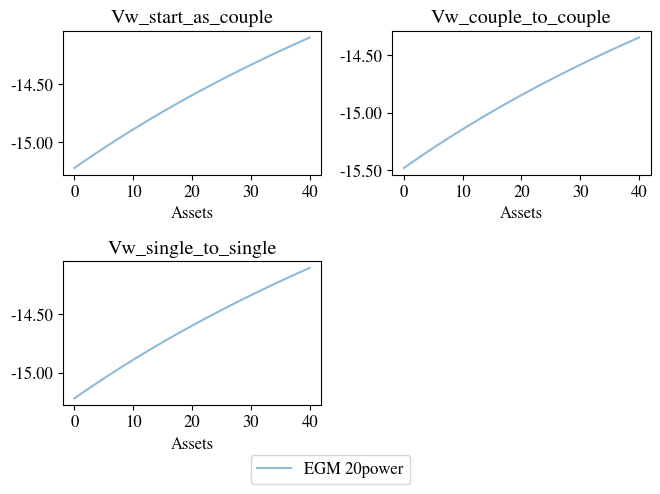

In [17]:
plot_type(models, plot_dimension, ['Vw_start_as_couple','Vw_couple_to_couple','Vw_single_to_single'], idx, **settings)

Plot male values

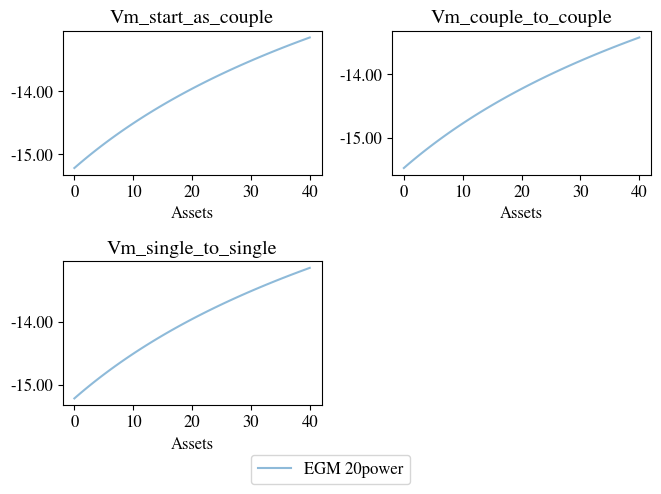

In [18]:
plot_type(models, plot_dimension, ['Vm_start_as_couple','Vm_couple_to_couple','Vm_single_to_single'], idx, **settings)

### Consumption

Total consumption

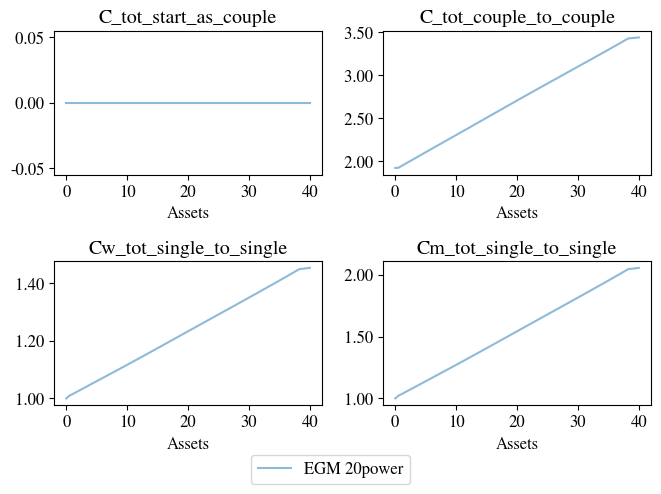

In [19]:
plot_type(models, plot_dimension, ['C_tot_start_as_couple','C_tot_couple_to_couple','Cw_tot_single_to_single','Cm_tot_single_to_single'], idx, **settings)

Plot female consumption

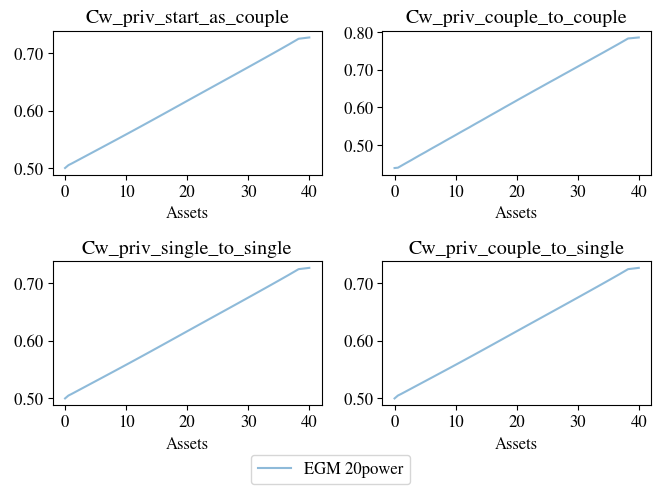

In [20]:
plot_type(models, plot_dimension, ['Cw_priv_start_as_couple','Cw_priv_couple_to_couple','Cw_priv_single_to_single', 'Cw_priv_couple_to_single'], idx, **settings)

Plot male consumption

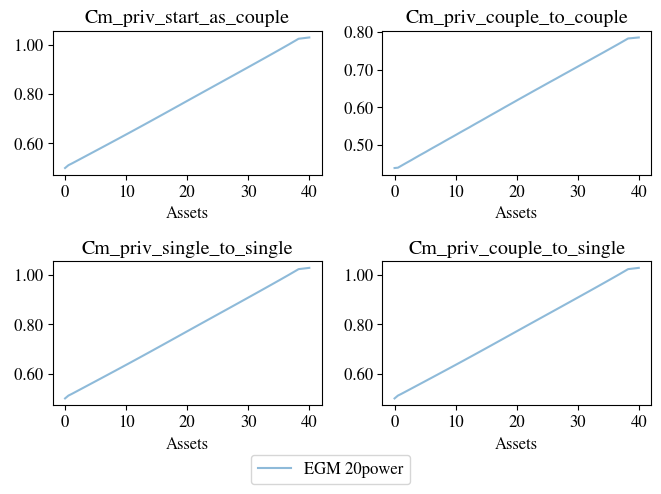

In [22]:
plot_type(models, plot_dimension, ['Cm_priv_start_as_couple','Cm_priv_couple_to_couple','Cm_priv_single_to_single', 'Cm_priv_couple_to_single'], idx, **settings)

Plot public consumption

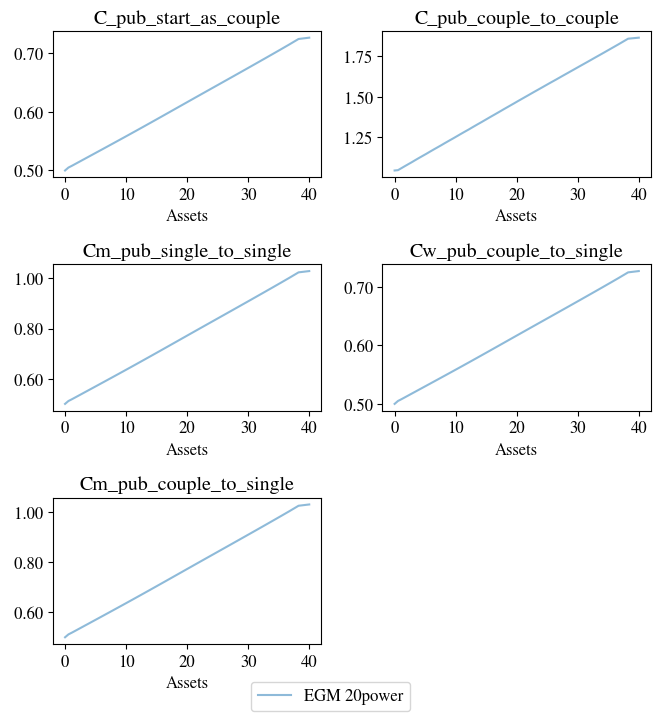

In [23]:
plot_type(models, plot_dimension, ['C_pub_start_as_couple','C_pub_couple_to_couple','Cm_pub_single_to_single', 'Cw_pub_couple_to_single', 'Cm_pub_couple_to_single', ], idx, **settings)

Plot marginal value

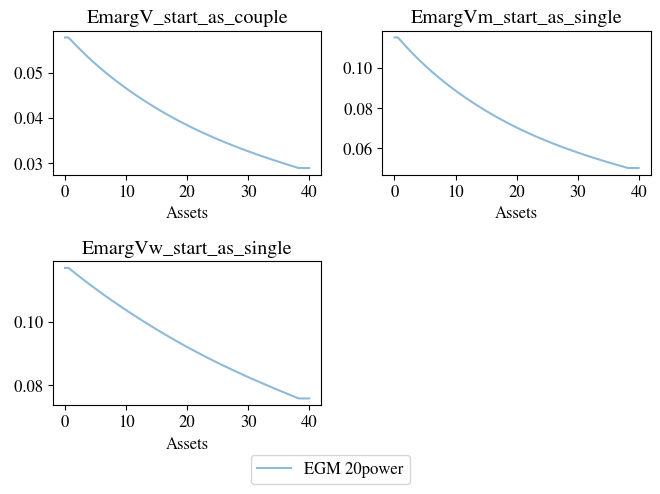

In [24]:
plot_type(models, plot_dimension, ['EmargV_start_as_couple', 'EmargVm_start_as_single', 'EmargVw_start_as_single' ], idx, **settings)

Bargaining power

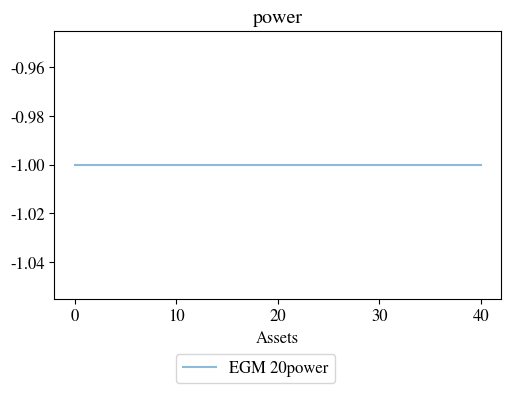

In [25]:
plot_type(models, plot_dimension, ['power',], idx, **settings)

# Focus on 2 models

In [ ]:
fail

NameError: name 'fail' is not defined

#### Specify models

In [ ]:
model1 = models[list(models.keys())[0]]
model2 = models[list(models.keys())[1]]

## Calculate differences

#### Absolute differences

Absolute differences

In [ ]:
sol_max_abs_diff = difference_in_namespace(model1.sol, model2.sol, output='max_abs_value', relative=False)
print_namespace(sol_max_abs_diff)

Index of absolute differences

In [ ]:
sol_max_abs_diff_index = difference_in_namespace(model1.sol, model2.sol, output='max_abs_index', relative=False)
print_namespace(sol_max_abs_diff_index)

#### Relative differences

Relative differences

In [ ]:
sol_max_rel_diff = difference_in_namespace(model1.sol, model2.sol, output='max_abs_value', relative=True)
print_namespace(sol_max_rel_diff)

Index of relative differences

In [ ]:
sol_max_rel_diff_index = difference_in_namespace(model1.sol, model2.sol, output='max_abs_index', relative=True)
print_namespace(sol_max_rel_diff_index)

## Find largest difference

Specify the variable that index of maximum absolute difference should be based on

In [ ]:
# Specify the variable that index of maximum absolute difference should be based on
variable = 'Vw_couple'

# Specify whether to find the index based on absolute or relative differences
relative = False

Find index with largest difference

In [ ]:
sol_max_diff_idx = difference_in_namespace(model1.sol, model2.sol, output='max_abs_index', relative=relative)

In [ ]:
idx = getattr(sol_max_diff_idx,variable)

try: #couple
    t,iP,iL,iA = idx
    print(f't = {t}, iP = {iP}, iL = {iL}, iA = {iA}')
except: #single
    t,iA = idx
    iP = 8
    iL = 20
    idx = t, iP, iL, iA
    print(f't = {t}, iP = {iP}, iL = {iL}, iA = {iA}')

## Plots of differences

#### Make model with absolute differences

In [ ]:
model_diff =  lmc.HouseholdModelClass(name='Model differences')
model_diff.par = model1.par
model_diff.sol = difference_in_namespace(model1.sol, model2.sol)

### Values

Plot female values

In [ ]:
model_plot([model_diff], plot_var_over_time, ['Vw_couple','Vw_remain_couple','Vw_single'], idx, shared_legend=True, subtitles=model_names)

Plot male values

In [ ]:
model_plot([model_diff], plot_var_over_time, ['Vm_couple','Vm_remain_couple','Vm_single'], idx, shared_legend=True, subtitles=model_names)

### Consumption

Plot female consumption

In [ ]:
model_plot([model_diff], plot_var_over_time, ['Cw_priv_couple','Cw_priv_remain_couple','Cw_priv_single','Cw_priv_single', 'Cw_priv_trans_single'], idx, shared_legend=True, subtitles=model_names)

Plot male consumption

In [ ]:
model_plot([model_diff], plot_var_over_time, ['Cm_priv_couple','Cm_priv_remain_couple','Cm_priv_single', 'Cm_priv_trans_single'], idx, shared_legend=True, subtitles=model_names)

Plot public consumption

In [ ]:
model_plot([model_diff], plot_var_over_time, ['C_pub_couple','C_pub_remain_couple','Cm_pub_single', 'Cw_pub_trans_single', 'Cm_pub_trans_single', ], idx, shared_legend=True, subtitles=model_names)

Plot consumption

In [ ]:
# plot pre_Ctot_Cw_priv in a 3 dimensional plot with using meshgrids 
fig = plt.figure()
ax = plt.axes(projection='3d')
mesh1, mesh2 = np.meshgrid(model1.par.grid_power, model1.par.grid_Ctot, indexing='ij')

ax.plot_surface(mesh1,mesh2, model_diff.sol.pre_Ctot_Cw_priv, cmap='viridis', edgecolor='none')

# label axes
ax.set_xlabel('Power')
ax.set_ylabel('Ctot')
